In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
%matplotlib inline

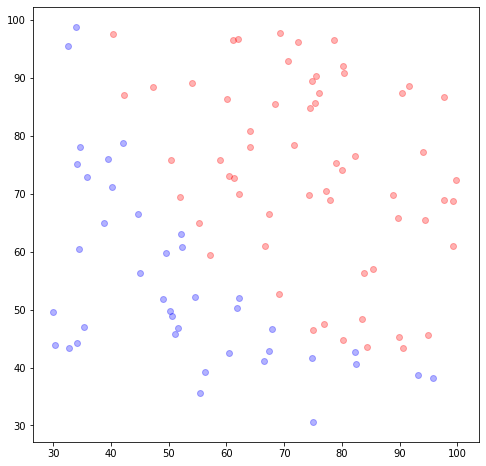

In [5]:
data    = np.genfromtxt("data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

In [13]:
def Z(theta0, theta1, theta2, x, y):
    return theta0 + theta1 * x + theta2 * y

def sigmoid(z):
    return 1/(1+np.exp(-z))

def objective(theta0, theta1, theta2, m):
    temp = 0
    for i in range(m):
        temp += (-label[i]*np.log(sigmoid(Z(theta0,theta1,theta2,x[i],y[i])))) - ((1-label[i])*np.log(1-sigmoid(Z(theta0,theta1,theta2,x[i],y[i]))))
    return temp / m

def grad(theta0,theta1,theta2,m,lr):
    temp = 0
    for i in range(m):
        temp += sigmoid(Z(theta0,theta1,theta2,x[i],y[i]))-label[i]
    new_theta0 = theta0 - lr / m * temp
    
    temp = 0
    for i in range(m):
        temp += (sigmoid(Z(theta0,theta1,theta2,x[i],y[i]))-label[i])*x[i]
    new_theta1 = theta1- lr / m * temp
    
    temp = 0
    for i in range(m):
        temp += (sigmoid(Z(theta0,theta1,theta2,x[i],y[i]))-label[i])*y[i]
    new_theta2 = theta2 - lr / m * temp
    
    return new_theta0, new_theta1, new_theta2

In [24]:
m = data.size//3
lr = 0.00001
theta0, theta1,theta2 = 0.1, 0.1, 0.1
t0, t1, t2 = list(),list(),list()
loss = []
itercount = 0
itermax = 10000

while True:
    
    if itercount>itermax:
        break
    
    t0.append(theta0)
    t1.append(theta1)
    t2.append(theta2)
    loss.append(objective(theta0, theta1, theta2, m))
    theta0, theta1, theta2 = grad(theta0,theta1,theta2,m,lr)
    
    if itercount > 2 and abs(loss[-1] - loss[-2])<0.0001:
        break
        
    itercount += 1

In [25]:
itercount

543

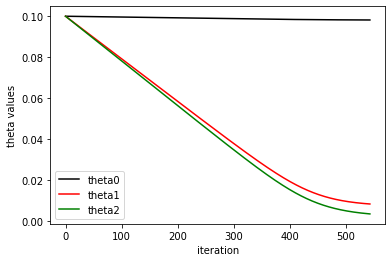

In [26]:
step = np.arange(0,itercount+1,1)
plt.plot(step, t0, c = 'k', label = 'theta0')
plt.plot(step, t1, c = 'r', label = 'theta1')
plt.plot(step, t2, c = 'g', label = 'theta2')
plt.legend()
plt.xlabel("iteration")
plt.ylabel("theta values")
plt.show()

In [ ]:
plt.plot(step, loss, c = 'k', label = 'training erre')

In [ ]:
loss[0]